#Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


#1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
warnings.filterwarnings('ignore')

In [62]:
# import some data to play with
hd_data = pd.read_csv('heart_disease.csv')

In [63]:
hd_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


#2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [64]:
hd_data.describe() #statistical summary of numerical columns

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [65]:
hd_data.info() # to know the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [66]:
hd_data[hd_data.duplicated()] # identifying duplicate record

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,TRUE,0.0,downsloping,fixed defect,2


In [67]:
hd_data.drop(index=765,inplace=True) #Deleting duplicate row


In [68]:
hd_data.isna().sum() # it sum of null values for each column. here we are seeing null values only in oldpeak column

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [69]:
hd_data['oldpeak'] = hd_data['oldpeak'].fillna(hd_data['oldpeak'].mean())
hd_data.isna().sum()
# filling the missing values in oldpeak column with mean
hd_data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.892308,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.055993,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [70]:
# identifying storing categorical columns from the dataset
categorical_columns = hd_data.select_dtypes(include=['object']).columns
categorical_columns


Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [71]:
# identifying storing numerical columns from the dataset to utilize in data visualization
numerical_columns = hd_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

Data Visualization

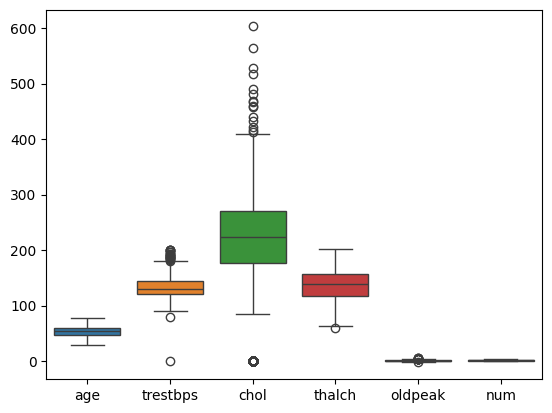

In [72]:
#box plot to identify outliers for each column. Here, we can determine that all numeric values has outliers except num column
sns.boxplot(data=hd_data[numerical_columns])
plt.show()

In [73]:
#handling outliers
for column in numerical_columns:
    Q1 = hd_data[column].quantile(0.25)
    Q3 = hd_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    hd_data = hd_data[(hd_data[column] >= lower_bound) & (hd_data[column] <= upper_bound)] # removing outliers from the dataset.


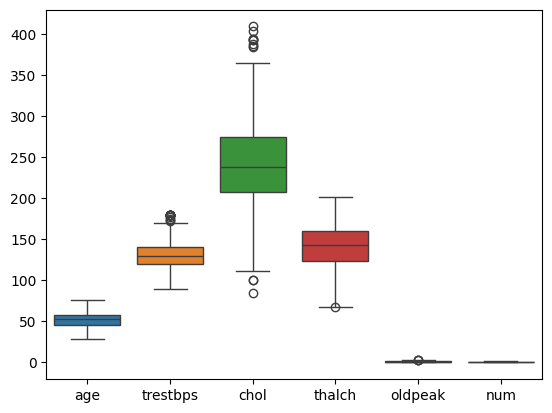

In [74]:
sns.boxplot(data=hd_data[numerical_columns])
plt.show()

In [75]:
hd_data.shape # to check the row count after cleaning outliers from the dataset

(617, 13)

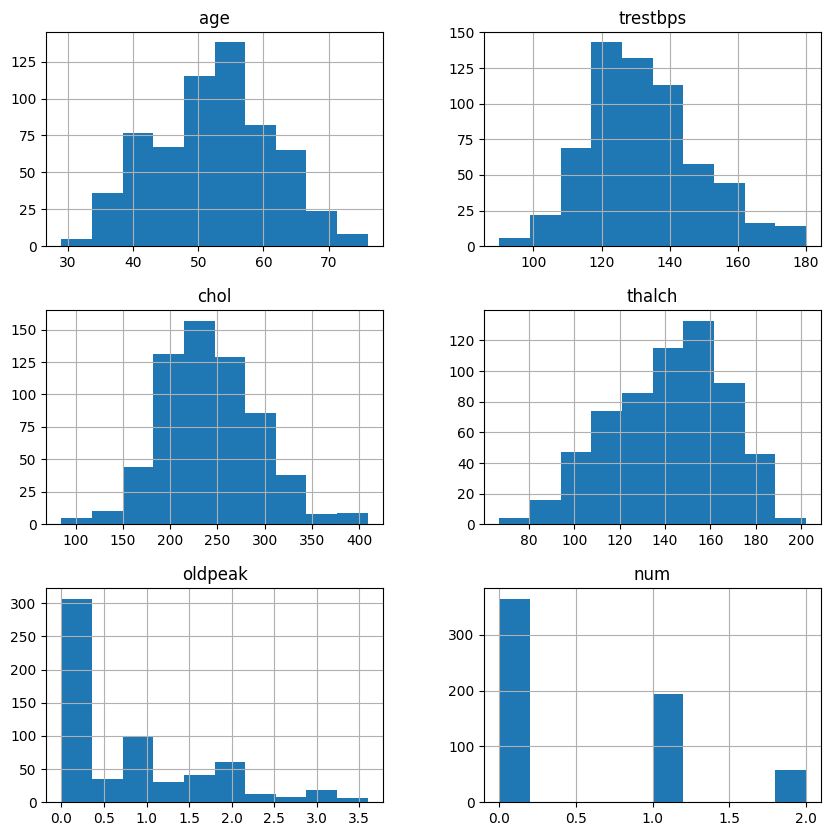

In [76]:
#plotting histogram for all the numerical values in the given dataset
hd_data.hist(figsize=(10,10))
plt.show()

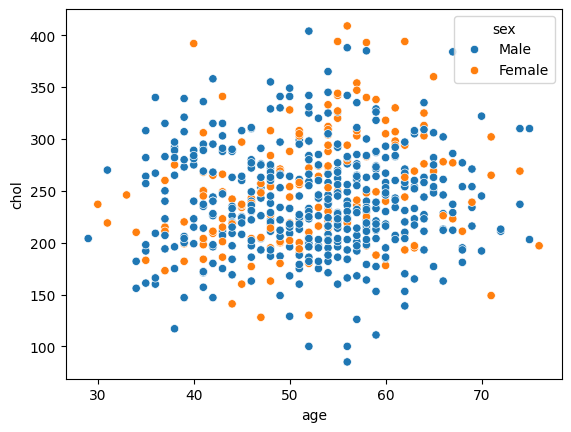

In [77]:
# scatterplot matrix
sns.scatterplot(data=hd_data,x='age',y='chol', hue='sex')
plt.show()


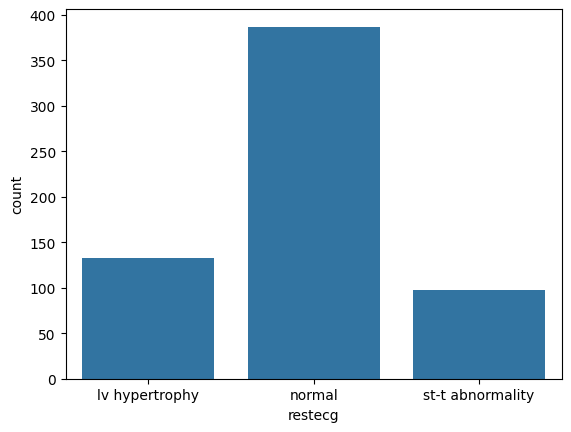

In [78]:
# presenting the count of each unique category of restcg column using count plot
sns.countplot(data=hd_data,x='restecg')
plt.show()

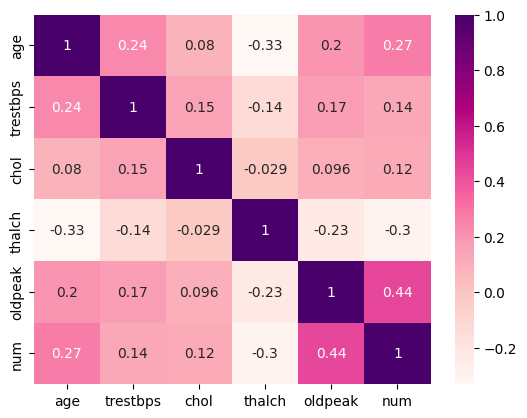

In [79]:
#correlation matrix for the given dataset
corr = hd_data[hd_data.describe().columns].corr()
sns.heatmap(corr, annot=True, cmap='RdPu')
plt.show()

#3. Feature Engineering:

In [80]:
hd_data.isna().sum() # There are no missing values, as we handled at the top

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


<Axes: >

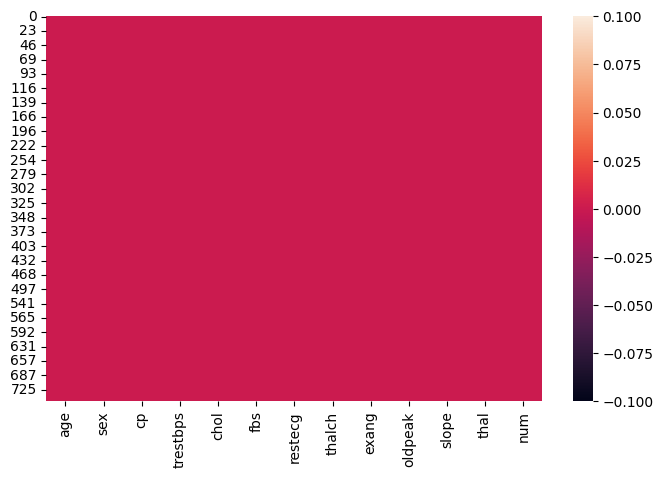

In [81]:
#checking missing values using heatmap. graph should not show white lines as we handled missing values at the top
plt.figure(figsize=(8, 5))
sns.heatmap(hd_data.isnull())

In [82]:
categorical_columns

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [83]:
#LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Category' column
for column in categorical_columns:
    hd_data[column] = label_encoder.fit_transform(hd_data[column])

# Display the result
hd_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0


#4. Decision Tree Classification:

In [84]:
x = hd_data.drop('num', axis=1)
y = hd_data['num']

In [85]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.2,random_state=42) # Splitting the data into train set and test set
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((123, 12), (494, 12), (123,), (494,))

In [86]:
#Creating Model With Default Value
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_model.fit(xtrain, ytrain)
ypred = dt_model.predict(xtest)


Model Evaluation

In [87]:
# displaying the Classification Report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.54      0.63       296
           1       0.40      0.75      0.52       150
           2       0.00      0.00      0.00        48

    accuracy                           0.55       494
   macro avg       0.39      0.43      0.39       494
weighted avg       0.59      0.55      0.54       494



In [88]:
# Comparing training And testing Accuracy
print('Training Accuracy for the Model is : ',dt_model.score(xtrain,ytrain))
print('Testing Accuracy for the Model is : ', dt_model.score(xtest, ytest))

Training Accuracy for the Model is :  0.8455284552845529
Testing Accuracy for the Model is :  0.548582995951417


In [89]:
# Hyperparameter Tuning
grid_params = {
    'criterion' : ["gini", "entropy"],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6]
    }
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=grid_params)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [90]:
grid.best_params_ # Best Parameters

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}

In [91]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.54      0.63       296
           1       0.40      0.75      0.52       150
           2       0.00      0.00      0.00        48

    accuracy                           0.55       494
   macro avg       0.39      0.43      0.39       494
weighted avg       0.59      0.55      0.54       494



#6. Model Evaluation and Analysis:

In [92]:
# Final Hyperparameter Model with Hyperparameter values
dt_final = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, splitter = 'random')
dt_final.fit(xtrain,ytrain)
ypred = dt_final.predict(xtest)



In [93]:
print("Classification Report:\n", classification_report(ytest, ypred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.74       296
           1       0.51      0.59      0.55       150
           2       0.20      0.21      0.20        48

    accuracy                           0.62       494
   macro avg       0.50      0.50      0.50       494
weighted avg       0.64      0.62      0.63       494



In [94]:
print('Training Accuracy for the Model is : ',dt_final.score(xtrain,ytrain))
print('Testing Accuracy for the Model is : ', dt_final.score(xtest, ytest))

Training Accuracy for the Model is :  0.8455284552845529
Testing Accuracy for the Model is :  0.6234817813765182


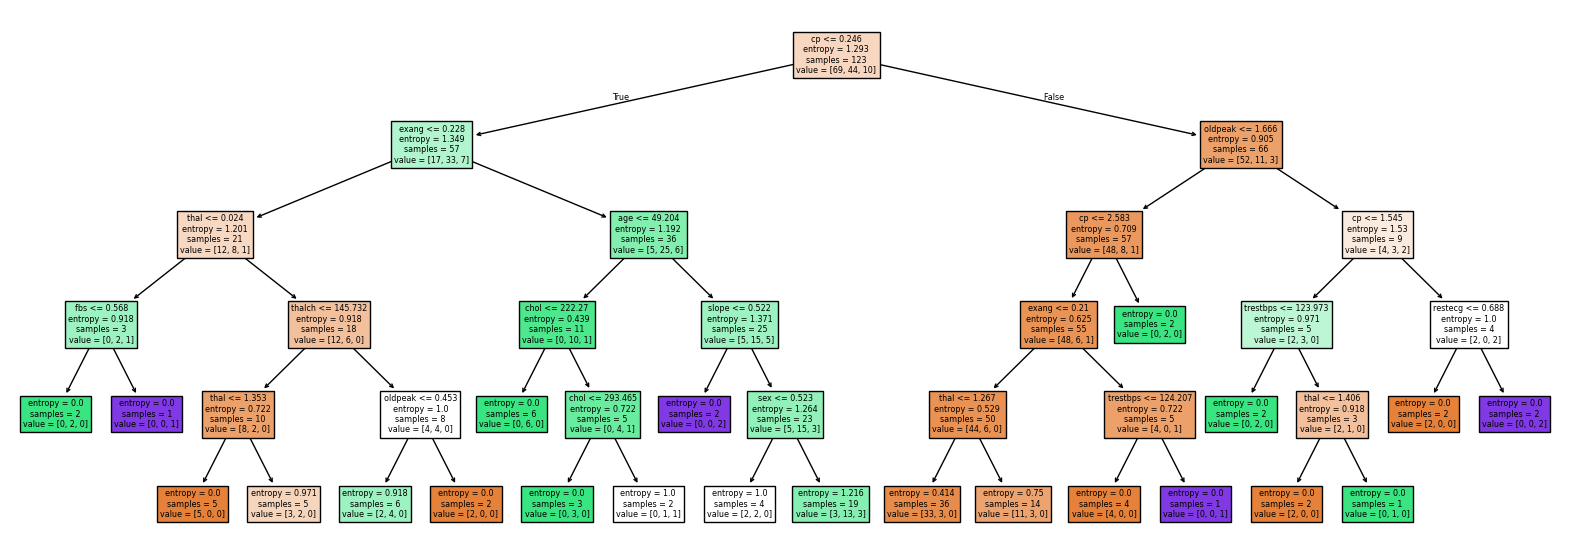

In [97]:
#plot final decision tree
plt.figure(figsize=(20,7))
tree.plot_tree(dt_final, feature_names=x.columns, filled=True)
plt.show()

Feature: 0, Score: 0.0403
Feature: 1, Score: 0.021
Feature: 2, Score: 0.3544
Feature: 3, Score: 0.0606
Feature: 4, Score: 0.0301
Feature: 5, Score: 0.0293
Feature: 6, Score: 0.0425
Feature: 7, Score: 0.0139
Feature: 8, Score: 0.1387
Feature: 9, Score: 0.0852
Feature: 10, Score: 0.0552
Feature: 11, Score: 0.1288


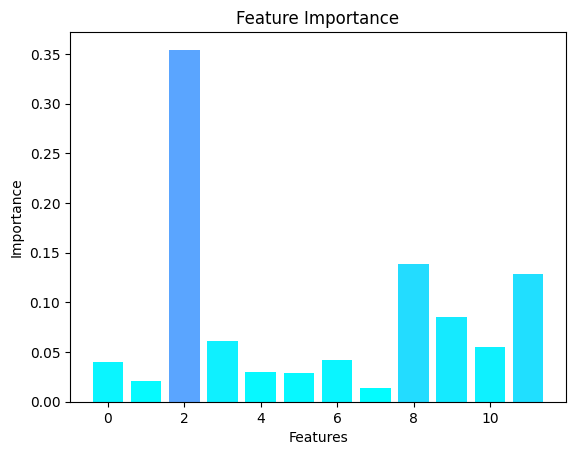

In [96]:
from matplotlib import cm # this import statment is used to colour the bar graph
# Get importance
imp_feature = dt_final.feature_importances_
# Summarize feature importance
for i, j in enumerate(imp_feature):
    print(f'Feature: {i}, Score: {round(j,4)}')

# Plot feature importance
plt.bar([x for x in range(len(imp_feature))], imp_feature, color = cm.cool(imp_feature))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()



#Interview Questions:



**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

Few key hyperparameters in Decision tree models:

max_depth : It controls the maximum depth to which the decision tree is allowed to grow.
min_samples_split : It regulates when a node can be split in decision tree.

max_features : it improves generalization when larger values create larger leaf nodes,.

criterion : It measures the quality of the split in the decision tree and supports two types criteris gini and entropy.


**2. What is the difference between the Label encoding and One-hot encoding?**

one hot encoding: It creates binary column represents a specific category (e.g., 1=True, 0=False).

label encoding: It creates unique integer value to each category in the feature. (e.g., 0 = Red, 1 = Green, 2 = Blue).